<a href="https://colab.research.google.com/github/WhiteBeyond/AI/blob/main/AI_23_2_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 44.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=44badaf202b7b01934c5e5d5e0c2b110cd8e96fb5085c0690928834817bf3795
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [5]:
import numpy as np
import skfuzzy as fz

x= np.arange(11)
mfx = fz.trimf(x,[0, 5, 10])
mfx_2 = fz.trimf(x,[0, 0, 5])
print(x)
print(mfx)
print(mfx_2)


[ 0  1  2  3  4  5  6  7  8  9 10]
[0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]
[1.  0.8 0.6 0.4 0.2 0.  0.  0.  0.  0.  0. ]


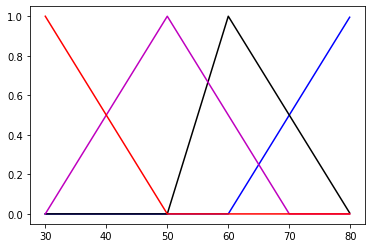

In [6]:
import matplotlib.pyplot as plt
x= np.arange(30, 80 , 0.1)
slow = fz.trimf(x, [30,30,50])
medium = fz.trimf(x, [30, 50, 70])
medium_fast = fz.trimf(x, [50,60,80])
full_speed = fz.trimf(x, [60, 80, 80])
plt.figure()
plt.plot(x, full_speed, 'b', linewidth  =1.5, label = 'Full speed')
plt.plot(x, medium_fast, 'k', linewidth  =1.5, label = 'Medium fast')
plt.plot(x, medium, 'm', linewidth  =1.5, label = 'medium')
plt.plot(x, slow, 'r', linewidth  =1.5, label = 'Slow')

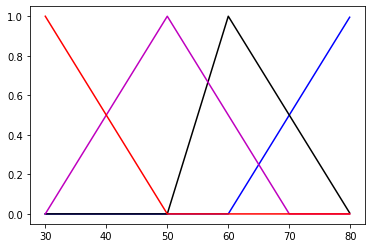

In [7]:
import matplotlib.pyplot as plt
x= np.arange(30, 80 , 0.1)
slow = fz.trapmf(x, [30,30,30,50])
medium = fz.trapmf(x, [30,50, 50, 70])
medium_fast = fz.trapmf(x, [50,60,60,80])
full_speed = fz.trapmf(x, [60, 80, 80, 80])
plt.figure()
plt.plot(x, full_speed, 'b', linewidth  =1.5, label = 'Full speed')
plt.plot(x, medium_fast, 'k', linewidth  =1.5, label = 'Medium fast')
plt.plot(x, medium, 'm', linewidth  =1.5, label = 'medium')
plt.plot(x, slow, 'r', linewidth  =1.5, label = 'Slow')

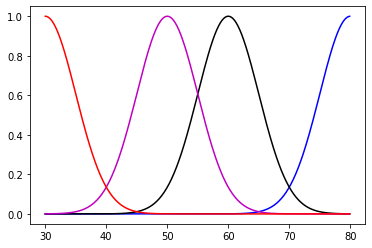

In [8]:
x= np.arange(30, 80 , 0.1)
slow = fz.gaussmf(x,30,5 )
medium = fz.gaussmf(x,50,5)
medium_fast = fz.gaussmf(x,60,5)
full_speed = fz.gaussmf(x,80,5)
plt.figure()
plt.plot(x, full_speed, 'b', linewidth  =1.5, label = 'Full speed')
plt.plot(x, medium_fast, 'k', linewidth  =1.5, label = 'Medium fast')
plt.plot(x, medium, 'm', linewidth  =1.5, label = 'medium')
plt.plot(x, slow, 'r', linewidth  =1.5, label = 'Slow')

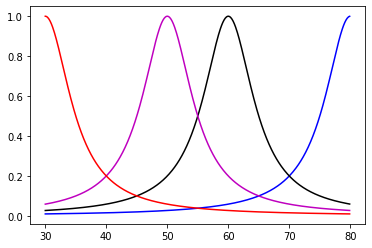

In [9]:
x= np.arange(30, 80 , 0.1)
slow = fz.gbellmf(x,5,1,30 )
medium = fz.gbellmf(x,5,1,50)
medium_fast = fz.gbellmf(x,5,1,60)
full_speed = fz.gbellmf(x,5,1,80)
plt.figure()
plt.plot(x, full_speed, 'b', linewidth  =1.5, label = 'Full speed')
plt.plot(x, medium_fast, 'k', linewidth  =1.5, label = 'Medium fast')
plt.plot(x, medium, 'm', linewidth  =1.5, label = 'medium')
plt.plot(x, slow, 'r', linewidth  =1.5, label = 'Slow')

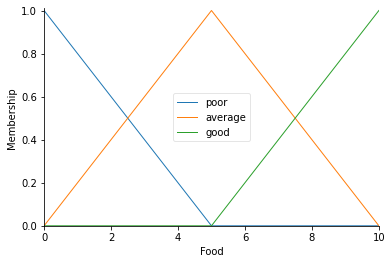

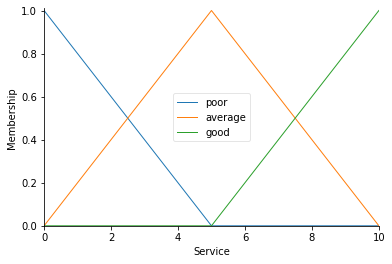

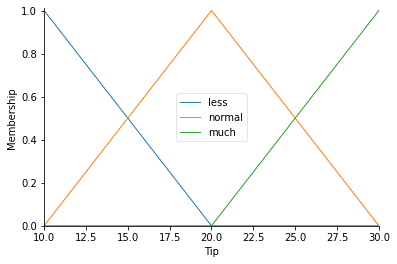

In [10]:
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1), 'Food')
service = ctrl.Antecedent(np.arange(0,11,1), 'Service')
tip = ctrl.Consequent(np.arange(10,31,1), 'Tip')

food['poor'] = fz.trimf(food.universe, [0,0,5])
food['average'] = fz.trimf(food.universe, [0,5,10])
food['good'] = fz.trimf(food.universe, [5,10,10])

service['poor'] = fz.trimf(service.universe, [0,0,5])
service['average'] = fz.trimf(service.universe, [0,5,10])
service['good'] = fz.trimf(service.universe, [5,10,10])

tip['less'] = fz.trimf(tip.universe, [10,10,20])
tip['normal'] = fz.trimf(tip.universe, [10,20,30])
tip['much'] = fz.trimf(tip.universe, [20,30,30])

food.view()
service.view()
tip.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

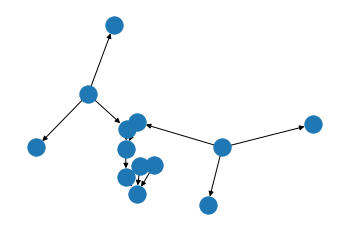

In [11]:
rule_1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule_2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule_3 = ctrl.Rule(food['poor'] & service['good'], tip['normal'])
rule_4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule_5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule_6 = ctrl.Rule(food['average'] & service['good'], tip['much'])
rule_7 = ctrl.Rule(food['good'] & service['poor'], tip['normal'])
rule_8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule_9 = ctrl.Rule(food['good'] & service['good'], tip['much'])
rule_1.view()

13.333333333333334


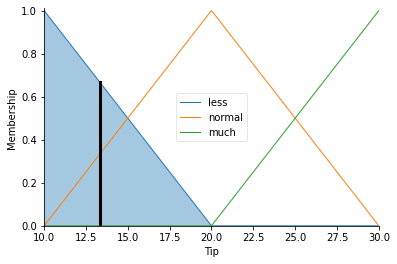

In [12]:
tipping_ctrl = ctrl.ControlSystem([rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9, rule_9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food'] = 0
tipping.input['Service'] = 0
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim=tipping)

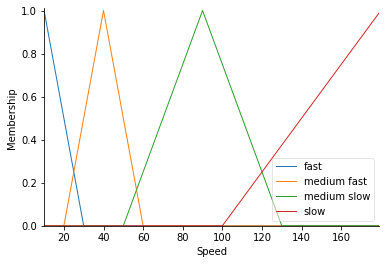

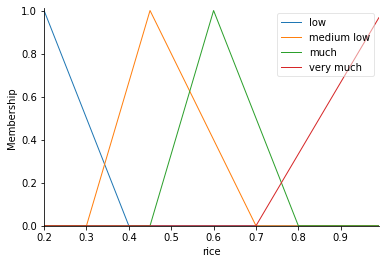

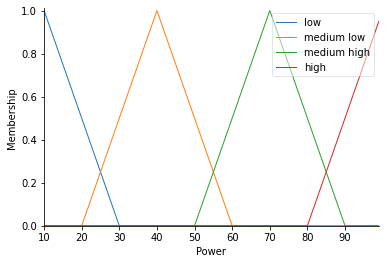

In [15]:
#HOMEWORK
from skfuzzy import control as ctrl

speed = ctrl.Antecedent(np.arange(10,180,1), 'Speed')
rice = ctrl.Antecedent(np.arange(0.2,1,0.01), 'rice')
power = ctrl.Consequent(np.arange(10,100,1), 'Power')
#speed
speed['fast'] = fz.trimf(speed.universe, [10,10,30])
speed['medium fast'] = fz.trimf(speed.universe, [20,40,60])
speed['medium slow'] = fz.trimf(speed.universe, [50,90,130])
speed['slow'] = fz.trimf(speed.universe, [100,180,180])
#rice amount
rice['low'] = fz.trimf(rice.universe, [0.2,0.2,0.4])
rice['medium low'] = fz.trimf(rice.universe, [0.3,0.45,0.7])
rice['much'] = fz.trimf(rice.universe, [0.45,0.6,0.8])
rice['very much'] = fz.trimf(rice.universe, [0.7,1,1])
#power 10 30 204060 5070 90 80 100
power['low'] = fz.trimf(power.universe, [10,10,30])
power['medium low'] = fz.trimf(power.universe, [20,40,60])
power['medium high'] = fz.trimf(power.universe, [50,70,90])
power['high'] = fz.trimf(power.universe, [80,100,100])

speed.view()
rice.view()
power.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

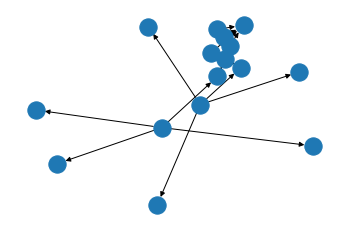

In [16]:
r_1 = ctrl.Rule(speed['slow'] & rice['low'], power['low'])
r_2 = ctrl.Rule(speed['medium slow'] & rice['low'], power['low'])
r_3 = ctrl.Rule(speed['medium fast'] & rice['low'], power['medium low'])
r_4 = ctrl.Rule(speed['fast'] & rice['low'], power['medium low'])
r_5 = ctrl.Rule(speed['slow'] & rice['medium low'], power['low'])
r_6 = ctrl.Rule(speed['medium slow'] & rice['medium low'], power['medium low'])
r_7 = ctrl.Rule(speed['medium fast'] & rice['medium low'], power['medium low'])
r_8 = ctrl.Rule(speed['fast'] & rice['medium low'], power['medium high'])
r_9 = ctrl.Rule(speed['slow'] & rice['much'], power['medium low'])
r_10 = ctrl.Rule(speed['medium slow'] & rice['much'], power['medium high'])
r_11 = ctrl.Rule(speed['medium fast'] & rice['much'], power['medium high'])
r_12 = ctrl.Rule(speed['fast'] & rice['much'], power['high'])
r_13 = ctrl.Rule(speed['slow'] & rice['very much'], power['medium high'])
r_14 = ctrl.Rule(speed['medium slow'] & rice['very much'], power['medium high'])
r_15 = ctrl.Rule(speed['medium fast'] & rice['very much'], power['high'])
r_16 = ctrl.Rule(speed['fast'] & rice['very much'], power['high'])
r_1.view()

50.99514563106803


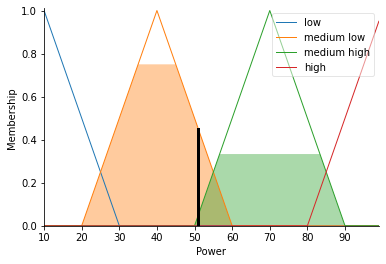

In [18]:
power_ctrl = ctrl.ControlSystem([r_1, r_2, r_3, r_4, r_5, r_6, r_7, r_8, r_9, r_10, r_11, r_12, r_13, r_14, r_15, r_16])
pow = ctrl.ControlSystemSimulation(power_ctrl)
pow.input['Speed'] = 100
pow.input['rice'] = 0.5
pow.compute()
print(pow.output['Power'])
power.view(sim=pow)